In [1]:
# coding:utf-8
# SIR模型预测新型冠状病毒肺炎数据


import scipy.integrate as spi
import numpy as np
# import pylab as pl
import matplotlib.pyplot as pl
import pandas as pd


beta = 8e-6
gamma = 0.04
TS = 1.0
ND = 116.0
S0 = 39000
I0 = 41
INPUT = [S0, I0, 0.0]


# 模型的差分方程
def diff_eqs(INP, t):
	Y = np.zeros((3))
	V = INP
	print(V)
	Y[0] = -beta * V[0] * V[1]
	Y[1] = beta * V[0] * V[1] - gamma * V[1]
	Y[2] = gamma * V[1]
	return Y


if __name__ == "__main__":	
	t_start = 0.0
	t_end = ND
	t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	RES = spi.odeint(diff_eqs, INPUT, t_range)
	print(S0,I0)
	print(RES)
	print(len(RES))
	
	fig = pl.figure()
	pl.subplot(111)
	pl.figure(figsize=(12,3))
	pl.plot(RES[:, 1], "-r", label = "Infectious", marker='|')
	pl.plot(RES[:, 0], "-y", label = "Susceptibles", marker='<')
	pl.plot(RES[:, 2], "-b", label = "Recovereds", marker='+')
	pl.legend(loc = 0)
	pl.title("COVID-19 in SIR")
	pl.xlabel("Date")
	pl.ylabel("Infectious Susceptibles")
	pl.rcParams['savefig.dpi'] = 300

	pl.savefig("result11.png")
	
	# 读取数据
	data = pd.read_csv("data11.csv", index_col = ["date"])
	data["现有感染者"] = data["感染者"] - data["死亡"] - data["治愈"]
	print(data)
	
	# 数据作图
	fig = pl.figure()
	pl.subplot(111)
	pl.figure(figsize=(12,3))
	pl.plot(data["疑似者"], "-b", label = "undecided", marker='3')
	pl.plot(data["死亡"], "-r", label = "death", marker='>')
	pl.plot(data["现有感染者"], "-g", label = "infected", marker='|')
	pl.plot(data["治愈"], "-p", label = "healed", marker='<')  
	pl.legend(loc = 0)
	pl.title("Count")
	pl.xlabel("Date")
	pl.ylabel("Infectious Susceptibles")
	pl.xticks(rotation=45,size=6)
	pl.show("realdata.png")
    
	fig = pl.figure()
	pl.figure(figsize=(12,3))
	pl.subplot(111)
	pl.figure(figsize=(12,3))    
	pl.plot(data["现有感染者"], "-g", label = "infected", marker='|')
	pl.plot(data["现有感染者"]-data["现有感染者"].shift(1), "-y", label = "difference", marker='*')
	pl.legend(loc = 0)
	pl.title("Change of Infected")
	pl.xlabel("Date")
	pl.ylabel("Infectious Susceptibles")
	pl.xticks(rotation=45,size=6)
	pl.savefig("realdata2.png")
	# 计算β值，用确诊病例除以密切接触者人数
	gammaguess = (data["治愈"]+data["死亡"])/data["感染者"]
	print(gammaguess)
	gamma = gammaguess[-7:-1].mean()
	print(gamma)
	beta = gamma*2.0
	print(beta)
	fig = pl.figure()
	pl.figure(figsize=(12,3))
	pl.plot(gammaguess)
	pl.xlabel("Date")
	pl.title("Best β")
	pl.ylabel("Value of β")
	pl.xticks(rotation=45,size=6)
	pl.show("gama.png")
	
	# γ值设定为0.04，即一般病程25天
	# 用最小二乘法估计β值和初始易感人数
#	gamma = 0.04
#	S0 = [i for i in range(20000, 40000, 1000)]
#	beta = [f for f in np.arange(1e-7, 1e-4, 1e-7)]
#	
#	# 定义偏差函数
#	def error(res):
#		err = (data["感染者"] - res)**2
#		errsum = sum(err)
#		return errsum
#		
	# 穷举法，找出与实际数据差的平方和最小的S0和beta值
#	# 结果 S0 = 39000, β = 8e-6
#	minSum = 1e10
#	minS0 = 0.0
#	minBeta = 0.0
#	bestRes = None
#	for S in S0:
#		for b in beta:
#			# 模型的差分方程
#			def diff_eqs_2(INP, t):
#				Y = np.zeros((3))
#				V = INP
#				Y[0] = -b * V[0] * V[1]
#				Y[1] = b * V[0] * V[1] - gamma * V[1]
#				Y[2] = gamma * V[1]
#				return Y
#			# 数值解模型方程
#			INPUT = [S, I0, 0.0]
#			RES = spi.odeint(diff_eqs_2, INPUT, t_range)
#			errsum = error(RES[:21, 1])
#			if errsum < minSum:
#				minSum = errsum
#				minS0 = S
#				minBeta = b
#				bestRes = RES
#				print("S0=%d beta=%f minErr=%f" % (S, b, errsum))
#				
#	print("S0 = %d β = %f" % (minS0, minBeta))
			
	print("预测最大感染人数:%d 位置:%d" % (RES[:,1].max(), np.argmax(RES[:, 1])))
	# 将预测值与真实值画到一起
	fig = pl.figure()
	pl.subplot(111)
	pl.figure(figsize=(12,3))
	pl.plot(RES[:, 1], "-r", label = "Infectious")
	pl.plot(data["现有感染者"], "o", label = "realdata")
# 	pl.plot(data["现有感染者"]-data["现有感染者"].shift(1), "-y", label = "increase")
	pl.legend(loc = 0)
	pl.title("COVID-19 in SIR")
	pl.xlabel("Date")
	pl.ylabel("Infectious Susceptibles")
	pl.rcParams['savefig.dpi'] = 300
	pl.xticks(rotation=45,size=6)
	pl.savefig("test11.png")


[39000.    41.     0.]
[3.89999992e+04 4.10007087e+01 1.04223302e-04]
[3.89999992e+04 4.10007087e+01 1.04225103e-04]
[3.89999984e+04 4.10014175e+01 2.08450207e-04]
[3.89999984e+04 4.10014175e+01 2.08452008e-04]
[3.89998942e+04 4.10921973e+01 1.35584544e-02]
[3.89998942e+04 4.10921975e+01 1.35584706e-02]
[3.89997899e+04 4.11831779e+01 2.69380145e-02]
[3.89997899e+04 4.11831782e+01 2.69380471e-02]
[3.89996853e+04 4.12743598e+01 4.03472141e-02]
[3.89996853e+04 4.12743600e+01 4.03472467e-02]
[3.89991508e+04 4.17403390e+01 1.08874736e-01]
[3.89991508e+04 4.17403414e+01 1.08875096e-01]
[3.89993256e+04 4.15879378e+01 8.64623015e-02]
[3.89993256e+04 4.15879389e+01 8.64624633e-02]
[3.89996136e+04 4.13368863e+01 4.95423872e-02]
[3.89996136e+04 4.13368864e+01 4.95423936e-02]
[3.89995417e+04 4.13995074e+01 5.87514778e-02]
[3.89995417e+04 4.13995073e+01 5.87514714e-02]
[3.89994698e+04 4.14622230e+01 6.79745000e-02]
[3.89994698e+04 4.14622230e+01 6.79745000e-02]
[3.89993978e+04 4.15250336e+01 7.7211

             感染者    疑似者    死亡     治愈  现有感染者
date                                       
2020/1/10     41      0     1      2     38
2020/1/11     41      0     1      6     34
2020/1/12     41      0     1      7     33
2020/1/13     41      0     1      7     33
2020/1/14     41      0     1      7     33
2020/1/15     41      0     2     12     27
2020/1/16     45      0     2     15     28
2020/1/17     62      0     2     19     41
2020/1/18    121      0     3     24     94
2020/1/19    198      0     3     25    170
2020/1/20    291     27     3     25    263
2020/1/21    440     37     9     25    406
2020/1/22    571    393    17     25    529
2020/1/23    830   1072    25     34    771
2020/1/24   1287   1965    41     38   1208
2020/1/25   1975   2684    56     49   1870
2020/1/26   2744   5794    80     51   2613
2020/1/27   4515   6973   106     60   4349
2020/1/28   5974   9239   132    103   5739
2020/1/29   7711  12167   170    124   7417
2020/1/30   9692  15238   213   

<Figure size 640x480 with 1 Axes>

<Figure size 1200x300 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 1200x300 with 1 Axes>

date
2020/1/10    0.073171
2020/1/11    0.170732
2020/1/12    0.195122
2020/1/13    0.195122
2020/1/14    0.195122
2020/1/15    0.341463
2020/1/16    0.377778
2020/1/17    0.338710
2020/1/18    0.223140
2020/1/19    0.141414
2020/1/20    0.096220
2020/1/21    0.077273
2020/1/22    0.073555
2020/1/23    0.071084
2020/1/24    0.061383
2020/1/25    0.053165
2020/1/26    0.047741
2020/1/27    0.036766
2020/1/28    0.039337
2020/1/29    0.038127
2020/1/30    0.039620
2020/1/31    0.042575
2020/2/1     0.043950
2020/2/2     0.048591
2020/2/3     0.051717
2020/2/4     0.056816
2020/2/5     0.061246
2020/2/6     0.069831
2020/2/7     0.080241
2020/2/8     0.093016
               ...   
2020/3/17    0.899151
2020/3/18    0.908438
2020/3/19    0.916814
2020/3/20    0.922878
2020/3/21    0.928231
2020/3/22    0.932806
2020/3/23    0.936817
2020/3/24    0.941744
2020/3/25    0.945449
2020/3/26    0.950742
2020/3/27    0.953900
2020/3/28    0.958283
2020/3/29    0.961199
2020/3/30    0.963583
2020/

<Figure size 640x480 with 0 Axes>

<Figure size 1200x300 with 1 Axes>

<Figure size 1200x300 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 1200x300 with 1 Axes>

预测最大感染人数:23769 位置:33


In [5]:
list(data["现有感染者"])

[38,
 34,
 33,
 33,
 33,
 27,
 28,
 41,
 94,
 170,
 263,
 406,
 529,
 771,
 1208,
 1870,
 2613,
 4349,
 5739,
 7417,
 9308,
 11289,
 13748,
 16369,
 19381,
 22942,
 26302,
 28985,
 31774,
 33738,
 35982,
 37626,
 38800,
 52526,
 55748,
 56873,
 57416,
 57934,
 58016,
 57805,
 56727,
 55389,
 53284,
 51606,
 49824,
 47760,
 45697,
 43352,
 40011,
 37502,
 35420,
 32741,
 30096,
 27524,
 25441,
 23872,
 22263,
 20616,
 19097,
 17802,
 16226,
 14932,
 13607,
 12178,
 10822,
 9996,
 9086,
 8184,
 7438,
 6763,
 6279,
 5849,
 5483,
 5165,
 4768,
 4471,
 4043,
 3790,
 3435,
 3199,
 3006,
 2895,
 2787,
 2686,
 2556,
 2537,
 2610,
 2676,
 2760,
 2850,
 2905,
 2965,
 3078,
 3066,
 3048,
 2969,
 2906]

In [3]:
list(RES[:, 1])

[41.0,
 53.813046525463605,
 70.62079971244454,
 92.66179944975623,
 121.55362796871154,
 159.4053421404931,
 208.96068848814107,
 273.7786475276266,
 358.4578368971691,
 468.90992099258875,
 612.6832846435512,
 799.3299556929356,
 1040.793498289525,
 1351.7693602005595,
 1749.9489982254618,
 2256.0011400390667,
 2893.0727698541973,
 3685.524074199205,
 4656.5858525215235,
 5824.714228603235,
 7198.703472304747,
 8772.157335717218,
 10518.63141481716,
 12389.329446221416,
 14315.161819855386,
 16213.878164037165,
 18001.090289492367,
 19602.245303626318,
 20962.10975810787,
 22049.433559119872,
 22856.45389672767,
 23394.60297579316,
 23688.47895065275,
 23769.874926231172,
 23672.937986281235,
 23430.81636797056,
 23073.683996711356,
 22627.82403030922,
 22115.42256581451,
 21554.78090178104,
 20960.736740999677,
 20345.159549845157,
 19717.441940513985,
 19084.947405179944,
 18453.398309008884,
 17827.201564889794,
 17209.71624730663,
 16603.470473767087,
 16010.335401099705,
 15431.

D:\Anaconda\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)
D:\Anaconda\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


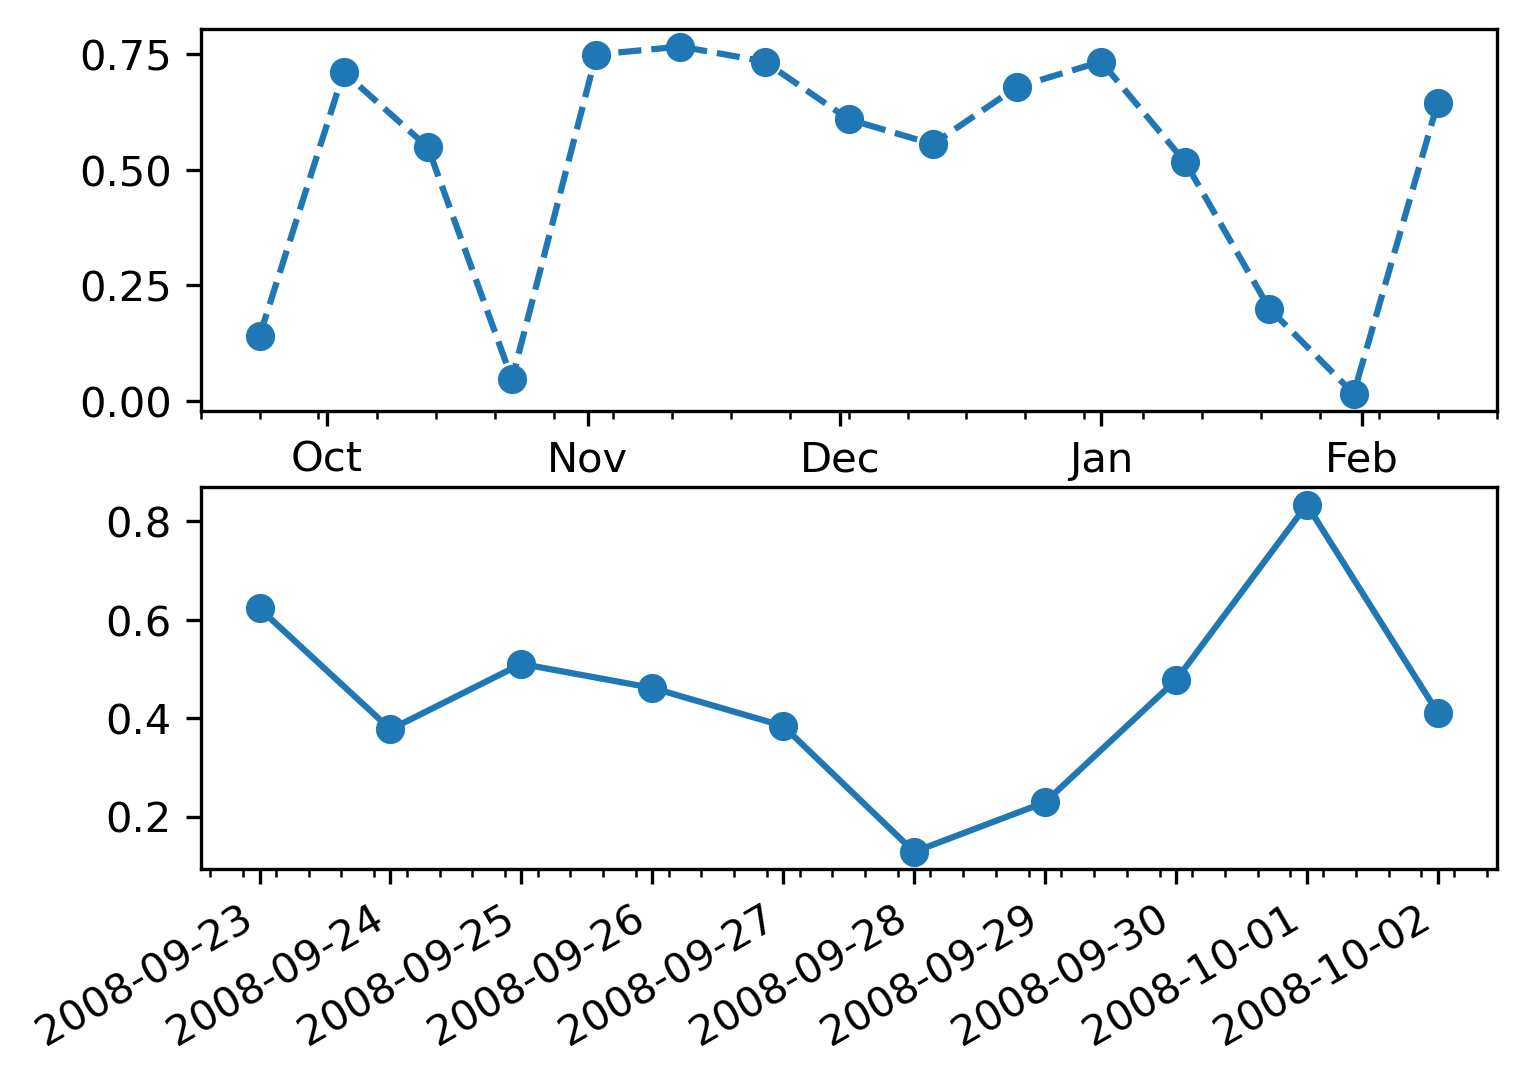

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import datetime as dt
 
fig = plt.figure()
ax2 = fig.add_subplot(212)
date2_1 = dt.datetime(2008,9,23)
date2_2 = dt.datetime(2008,10,3)
delta2 = dt.timedelta(days=1)
dates2 = mpl.dates.drange(date2_1, date2_2, delta2)
y2 = np.random.rand(len(dates2))
ax2.plot_date(dates2, y2, linestyle='-')
dateFmt = mpl.dates.DateFormatter('%Y-%m-%d')
ax2.xaxis.set_major_formatter(dateFmt)
 
daysLoc = mpl.dates.DayLocator()
hoursLoc = mpl.dates.HourLocator(interval=6)
ax2.xaxis.set_major_locator(daysLoc)
ax2.xaxis.set_minor_locator(hoursLoc)
 
fig.autofmt_xdate(bottom=0.18)
fig.subplots_adjust(left=0.18)
 
ax1 = fig.add_subplot(211)
date1_1 = dt.datetime(2008, 9, 23)
date1_2 = dt.datetime(2009, 2, 16)
delta1 = dt.timedelta(days=10)
dates1 = mpl.dates.drange(date1_1, date1_2, delta1)
y1 = np.random.rand(len(dates1))
ax1.plot_date(dates1, y1, linestyle='--')
# monthsLoc = mpl.dates.MonthLocator()
weeksLoc = mpl.dates.WeekdayLocator()
# ax1.xaxis.set_major_locator(monthsLoc)
ax1.xaxis.set_minor_locator(weeksLoc)
monthsFmt = mpl.dates.DateFormatter('%b')
ax1.xaxis.set_major_formatter(monthsFmt)
 
plt.show()

In [38]:
RES

array([[3.90000000e+04, 4.10000000e+01, 0.00000000e+00],
       [3.89853023e+04, 5.38130465e+01, 1.88467893e+00],
       [3.89660210e+04, 7.06207997e+01, 4.35817802e+00],
       [3.89407342e+04, 9.26617994e+01, 7.60395240e+00],
       [3.89075841e+04, 1.21553628e+02, 1.18622496e+01],
       [3.88641472e+04, 1.59405342e+02, 1.74474277e+01],
       [3.88072689e+04, 2.08960688e+02, 2.47703654e+01],
       [3.87328540e+04, 2.73778648e+02, 3.43673249e+01],
       [3.86356053e+04, 3.58457837e+02, 4.69368929e+01],
       [3.85087032e+04, 4.68909921e+02, 6.33868655e+01],
       [3.83434236e+04, 6.12683285e+02, 8.48930811e+01],
       [3.81286979e+04, 7.99329956e+02, 1.12972108e+02],
       [3.78506374e+04, 1.04079350e+03, 1.49569140e+02],
       [3.74920696e+04, 1.35176936e+03, 1.97161073e+02],
       [3.70321789e+04, 1.74994900e+03, 2.58872056e+02],
       [3.64464047e+04, 2.25600114e+03, 3.38594149e+02],
       [3.57068288e+04, 2.89307277e+03, 4.41098473e+02],
       [3.47833638e+04, 3.68552